<a href="https://colab.research.google.com/github/clerfayt28/Pitonchik/blob/main/PyTorch_Tutorial_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [9]:
from torchvision.transforms.transforms import ToTensor
# device config
device = torch.device ('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root='./wine', train=True,
    transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./wine', train=False,
    transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader (dataset=train_dataset, batch_size=batch_size,
     shuffle=True)

test_loader = torch.utils.data.DataLoader (dataset=test_dataset, batch_size=batch_size,
     shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


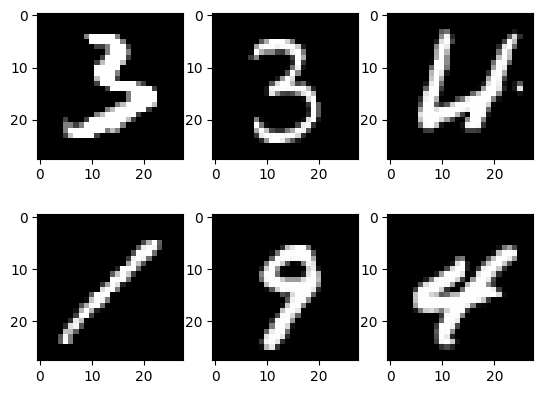

In [10]:
for i in range (6):
  plt.subplot (2, 3, i+1)
  plt.imshow (samples [i][0], cmap = 'gray')
plt.show ()

In [11]:
class NeuralNet (nn.Module):
  def __init__ (self, input_size, hidden_size, num_classes):
    super (NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward (self, x):
    out = self.l1 (x)
    out = self.relu (out)
    out = self.l2 (out)
    return out

model = NeuralNet (input_size, hidden_size, num_classes)

In [13]:
#loss and optimizer
criterion = nn.CrossEntropyLoss ()
optimizer = torch.optim.Adam (model.parameters (), lr=learning_rate)

#training loop
n_total_steps = len (train_loader)
for epoch in range (num_epochs):
  for i, (images, labels) in enumerate (train_loader):
    #100, 1, 28, 28
    #100, 784
    images = images.reshape (-1, 28*28).to(device)
    labels = labels.to(device)

    #forward
    outputs = model (images)
    loss = criterion (outputs, labels)

    #backwards
    optimizer.zero_grad ()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print (f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

#test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape (-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model (images)

    #value, index
    _, predictions = torch.max (outputs, 1)
    n_samples += labels.shape [0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc}')

epoch 1/2, step 100/600, loss = 0.4357
epoch 1/2, step 200/600, loss = 0.3371
epoch 1/2, step 300/600, loss = 0.2784
epoch 1/2, step 400/600, loss = 0.2394
epoch 1/2, step 500/600, loss = 0.1543
epoch 1/2, step 600/600, loss = 0.2591
epoch 2/2, step 100/600, loss = 0.1081
epoch 2/2, step 200/600, loss = 0.3082
epoch 2/2, step 300/600, loss = 0.1126
epoch 2/2, step 400/600, loss = 0.2577
epoch 2/2, step 500/600, loss = 0.1414
epoch 2/2, step 600/600, loss = 0.1640
accuracy = 95.13
